<a href="https://colab.research.google.com/github/Saigeetha19112004/PRODIGY_ML_01/blob/main/Hand_gesture_ML_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#kaggle api
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.11G/2.13G [00:23<00:00, 173MB/s]
100% 2.13G/2.13G [00:23<00:00, 95.8MB/s]


In [ ]:
!ls

kaggle.json  leapgestrecog.zip	sample_data


In [ ]:
from zipfile import ZipFile
file_name = "leapgestrecog.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import os
path, dirs, files = next(os.walk("/content/leapgestrecog"))
file_count = len(files)
print(file_count)

0


In [ ]:
!unzip leapgestrecog.zip

Archive:  leapgestrecog.zip
replace leapGestRecog/00/01_palm/frame_00_01_0001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/leapGestRecog'):
    pass

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
from keras.layers import MaxPooling2D

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "/content/leapGestRecog"

In [ ]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 6, 5, ..., 6, 5, 5],
        [5, 5, 6, ..., 5, 5, 5],
        [5, 5, 6, ..., 6, 6, 5],
        ...,
        [5, 5, 6, ..., 8, 7, 6],
        [4, 5, 5, ..., 7, 8, 6],
        [5, 5, 6, ..., 8, 7, 6]], dtype=uint8),
 0]

In [ ]:
import random
random.shuffle(image_data)

In [ ]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

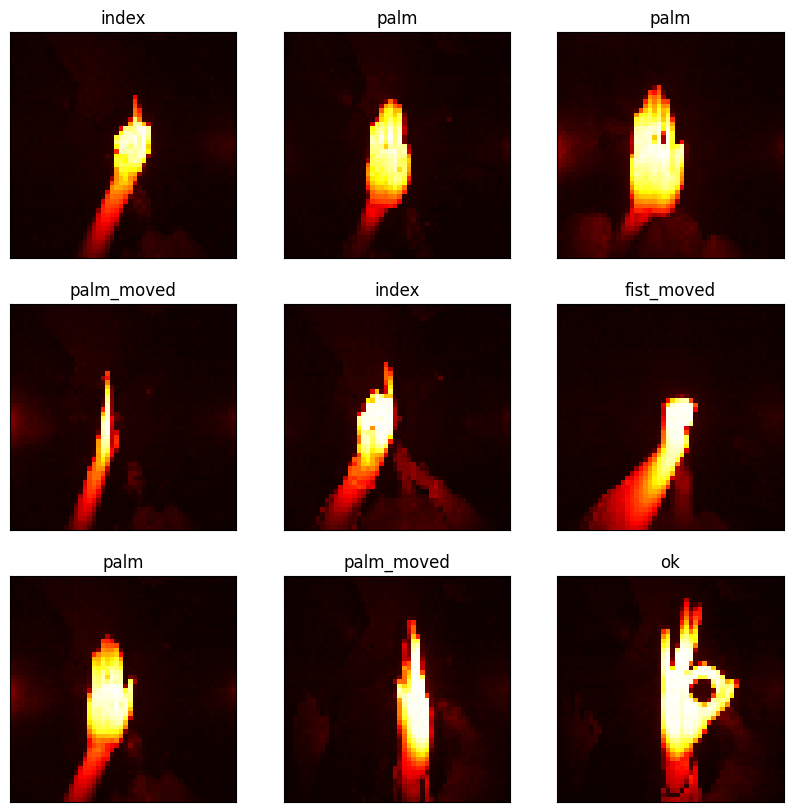

In [ ]:
label[:10]
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [ ]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [ ]:
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [ ]:
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt

model = Sequential()

# Add convolutional layers
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add max pooling layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(units=128))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/7
438/438 [==============================] - 105s 237ms/step - loss: 0.1327 - accuracy: 0.9699 - val_loss: 2.3419 - val_accuracy: 0.3763
Epoch 2/7
438/438 [==============================] - 99s 226ms/step - loss: 0.0054 - accuracy: 0.9999 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 3/7
438/438 [==============================] - 95s 218ms/step - loss: 0.0064 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9997
Epoch 4/7
438/438 [==============================] - 89s 203ms/step - loss: 0.0033 - accuracy: 0.9997 - val_loss: 6.2696e-04 - val_accuracy: 1.0000
Epoch 5/7
438/438 [==============================] - 90s 204ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.1290 - val_accuracy: 0.9642
Epoch 6/7
438/438 [==============================] - 94s 215ms/step - loss: 0.0101 - accuracy: 0.9976 - val_loss: 0.0657 - val_accuracy: 0.9883
Epoch 7/7
438/438 [==============================] - 101s 230ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 6.7572e-04 - val

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()